In [4]:
#geom
IRC_1 = """
    C     0.18834300    0.02396400   -0.56061900 
    O    -0.20403500   -0.02596000    0.56706500 
    H    -0.51858800   -0.06597900   -1.44292600 
    H     1.28204000    0.16311500   -0.81923400 
    """
IRC_2 = """
    C     0.41902204    0.05331266   -0.54403553 
    O     0.25588380    0.03255639    0.60278221 
    H     0.88377157    0.11244329   -1.53910358 
    H     2.01463507    0.25632437   -0.94766159 
    """
IRC_3 = """  
    C     0.59833500    0.39767800   -0.18425800 
    H     0.37000300    1.38291300    0.29632100 
    O    -0.45311200   -0.30723500    0.12447400 
    H    -0.34035600   -1.21995400   -0.20267500 
    """
IRC_4 = """
    C     0.58587600    0.45045700   -0.20801900 
    H     0.73525300    1.07905700    0.71877800 
    O    -0.46458600   -0.33054600    0.08064000 
    H    -0.33785800   -1.19656100    0.47826000 
    """
IRC_5 = """
    C     0.53130500    0.48508100   -0.19076100 
    H     1.06570900    0.65389100    0.78544300 
    O    -0.43639000   -0.35536800    0.03965400 
    H    -0.44266200   -0.79185800    0.92338400 
    """
IRC_6 = """     
    C     0.15231500    0.66430200    0.00000000 
    H    -1.17307000    0.94876300    0.00000000 
    O     0.15231500   -0.60360200    0.00000000 
    H    -0.95934400   -0.10575800    0.00000000 
    """
IRC_7 = """
    C    -0.23773900   -0.03026500   -0.52939800 
    O    -0.12476800   -0.01586400    0.58967200 
    H     2.17955400    0.27733300   -1.66430700 
    H     2.89543600    0.36839200   -1.47114600 
    """

In [28]:
# rhf/ccsd/fci with sto3g 

import numpy as np  
from pyscf import gto,scf,cc,fci,mcscf,mp  
IRC_mols = [IRC_1, IRC_2, IRC_3, IRC_4, IRC_5, IRC_6, IRC_7]  
irc1 = [-6.18849, -3.58596,1.21941]
irc2 = [-5.90226,-3.58596,-1.90749]
irc3 = [-1.90749,0,1.69918]
irc4 = [1.69918,3.38165,9.21692]
rhf_list=[]  
fci_list=[]  
ccsd_list=[]   
for R in range(0,7):          
    mol = gto.M(atom = IRC_mols[R], basis = 'sto-3g', verbose=3)   
    
    molRHF = scf.RHF(mol)    
    energy_RHF = molRHF.kernel()     
    rhf_list.append(energy_RHF)       
    
    molCCSD = cc.RCCSD(molRHF)     
    energy_CCSD = molCCSD.kernel()[0]+energy_RHF     
    ccsd_list.append(energy_CCSD)     
    
    molFCI = fci.FCI(mol, molRHF.mo_coeff)     
    molFCI.nroots = 2     
    #molFCI = fci.addons.fix_spin_(molFCI, ss=2) # S*(S+1)     
    energy_FCI = molFCI.kernel()[0][0]     
    fci_list.append(energy_FCI)


converged SCF energy = -112.35181647546
E(CCSD) = -112.4937481025563  E_corr = -0.1419316270965968
converged SCF energy = -112.118320880014
E(CCSD) = -112.3022867980027  E_corr = -0.1839659179884762
converged SCF energy = -112.276987354268
E(CCSD) = -112.3896381279346  E_corr = -0.1126507736667792
converged SCF energy = -112.225026039681
E(CCSD) = -112.3272264541166  E_corr = -0.1022004144355668
converged SCF energy = -112.267272417746
E(CCSD) = -112.3821561070058  E_corr = -0.1148836892599176
converged SCF energy = -112.092877015053
E(CCSD) = -112.2490138361966  E_corr = -0.1561368211433065
converged SCF energy = -112.340106166145
E(CCSD) = -112.4913441451926  E_corr = -0.1512379790474534


In [52]:

print("rhf_list = ", rhf_list)
print("fci_list = ", fci_list)
print("ccsd_list = ", ccsd_list)

rhf_list =  [-112.35181647545967, -112.11832088001422, -112.27698735426779, -112.22502603968105, -112.26727241774583, -112.09287701505328, -112.34010616614508]
fci_list =  [-112.49653777082595, -112.31256022994627, -112.3942008086764, -112.34498413623673, -112.38682733158575, -112.25895581162125, -112.49917628631054]
ccsd_list =  [-112.49374810255627, -112.3022867980027, -112.38963812793457, -112.32722645411663, -112.38215610700574, -112.24901383619658, -112.49134414519253]


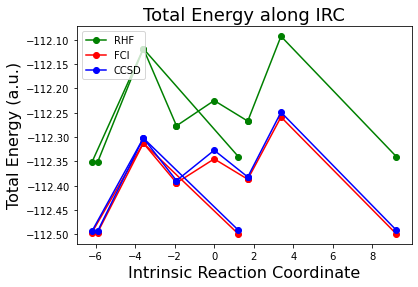

In [40]:
import matplotlib.pyplot as plt 
plt.title("Total Energy along IRC", fontsize=18) 
plt.xlabel("Intrinsic Reaction Coordinate", fontsize=16) 
plt.ylabel("Total Energy (a.u.)",fontsize=16) 
plt.plot(irc1, (rhf_list[0],rhf_list[1],rhf_list[6]), 'go-', label = 'RHF')
plt.plot(irc2, rhf_list[0:3], 'go-')
plt.plot(irc3, rhf_list[2:5], 'go-')
plt.plot(irc4, rhf_list[4:7], 'go-')

plt.plot(irc1, (fci_list[0],fci_list[1],fci_list[6]), 'ro-', label = 'FCI')
plt.plot(irc2, fci_list[0:3], 'ro-')
plt.plot(irc3, fci_list[2:5], 'ro-')
plt.plot(irc4, fci_list[4:7], 'ro-')

plt.plot(irc1, (ccsd_list[0],ccsd_list[1],ccsd_list[6]), 'bo-', label = 'CCSD')
plt.plot(irc2, ccsd_list[0:3], 'bo-')
plt.plot(irc3, ccsd_list[2:5], 'bo-')
plt.plot(irc4, ccsd_list[4:7], 'bo-')

#plt.ylim(-77.25,-77.1) 
#plt.xlim(0,180) 
plt.legend(loc = 2) 
plt.show()

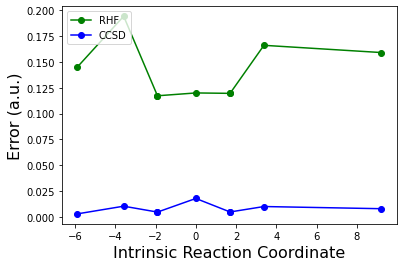

In [55]:
import matplotlib.pyplot as plt 
#plt.title("Total Energy along IRC", fontsize=18) 
plt.xlabel("Intrinsic Reaction Coordinate", fontsize=16) 
plt.ylabel("Error (a.u.)",fontsize=16) 
#plt.plot(irc1, (rhf_list[0] - fci_list[0],rhf_list[1]-fci_list[1],rhf_list[6]-fci_list[6]), 'go-')
plt.plot(irc2, (rhf_list[0] - fci_list[0],rhf_list[1]-fci_list[1],rhf_list[2]-fci_list[2]), 'go-', label = 'RHF')
plt.plot(irc3, (rhf_list[2] - fci_list[2],rhf_list[3]-fci_list[3],rhf_list[4]-fci_list[4]), 'go-')
plt.plot(irc4, (rhf_list[4] - fci_list[4],rhf_list[5]-fci_list[5],rhf_list[6]-fci_list[6]), 'go-')

#plt.plot(irc1, (ccsd_list[0] - fci_list[0],ccsd_list[1]-fci_list[1],ccsd_list[6]-fci_list[6]), 'bo-') 
plt.plot(irc2, (ccsd_list[0] - fci_list[0],ccsd_list[1]-fci_list[1],ccsd_list[2]-fci_list[2]), 'bo-', label = 'CCSD') 
plt.plot(irc3, (ccsd_list[2] - fci_list[2],ccsd_list[3]-fci_list[3],ccsd_list[4]-fci_list[4]), 'bo-') 
plt.plot(irc4, (ccsd_list[4] - fci_list[4],ccsd_list[5]-fci_list[5],ccsd_list[6]-fci_list[6]), 'bo-')

#plt.ylim(-77.25,-77.1) 
#plt.xlim(0,180) 
plt.legend(loc = 2) 
plt.show()